# Machine Learning Examples (Review  COVID19 Situation India)

* See: https://github.com/bnsreenu/python_for_microscopists (00_A review of COVID19 situation in India using Python.py)
* CSV Data: https://www.kaggle.com/sudalairajkumar/covid19-in-india/data#

In [8]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://youtu.be/ygqXRz4a0nU

"""
Download csv from:
    https://www.kaggle.com/sudalairajkumar/covid19-in-india/data#
"""

import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

#date location new_cases new_deaths	total_cases	total_deaths
CVD = pd.read_csv('data/covid_19_india.csv')
print(CVD.head())

#Check for missing data
print(CVD.isnull().sum()) #No missing data
CVD=CVD.dropna()


CVD.drop(['Sno', 'Time', 'Cured', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1, inplace=True)

print(CVD.dtypes)

   Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  
Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths         

In [9]:
# Convert string values of date to datetime format
#CVD['Date'] = CVD['Date'].astype(str)
CVD['Date'] = [dt.datetime.strptime(x,'%d/%m/%y') for x in CVD['Date']] 
print(CVD.dtypes)

#Change column titles to something appropriate
CVD.columns = ['Date', 'State', 'Total Deaths', 'Total Cases']

#Group them by location and date, select only total cases and deaths for closer observation
#Reset index because groupby by default makes grouped columns indices
CVD = pd.DataFrame(CVD.groupby(['State', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()

#Sort values by each country and by date - descending. Easy to interpret plots
CVD = CVD.sort_values(by = ['State','Date'], ascending=False)
print(CVD)

Date                    datetime64[ns]
State/UnionTerritory            object
Deaths                           int64
Confirmed                        int64
dtype: object
                            State       Date  Total Cases  Total Deaths
9290                  West Bengal 2020-12-09       507995          8820
9289                  West Bengal 2020-12-08       505054          8771
9288                  West Bengal 2020-12-07       502840          8723
9287                  West Bengal 2020-12-06       499697          8677
9286                  West Bengal 2020-12-05       496522          8628
...                           ...        ...          ...           ...
4     Andaman and Nicobar Islands 2020-03-30            9             0
3     Andaman and Nicobar Islands 2020-03-29            9             0
2     Andaman and Nicobar Islands 2020-03-28            6             0
1     Andaman and Nicobar Islands 2020-03-27            1             0
0     Andaman and Nicobar Islands 2020

<ipython-input-9-f1e4c1a8db4b>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CVD = pd.DataFrame(CVD.groupby(['State', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()


C:\Users\peter\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


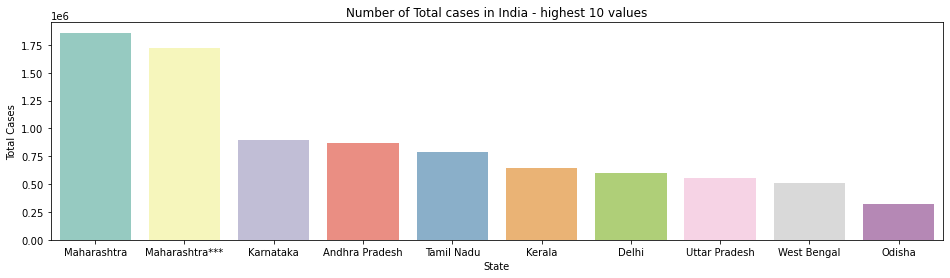

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


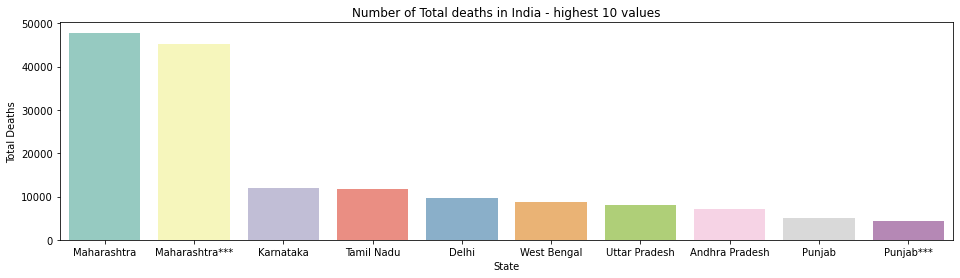

          Date  Total Cases  Total Deaths
0   2020-01-30            1             0
1   2020-01-31            1             0
2   2020-02-01            2             0
3   2020-02-02            3             0
4   2020-02-03            3             0
..         ...          ...           ...
310 2020-12-05      9608211        139700
311 2020-12-06      9644222        140182
312 2020-12-07      9677203        140573
313 2020-12-08      9703770        140958
314 2020-12-09      9735850        141360

[315 rows x 3 columns]


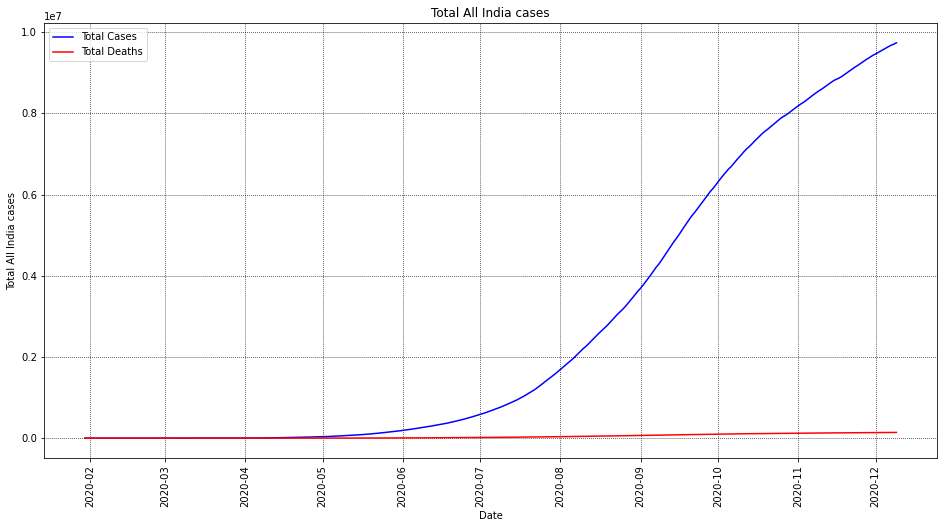

In [10]:
################################################
#Plot cases and deaths as bar plot for top 10 countries
#Function to plot bar plots using Seaborn.

def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

filtered_CVD = CVD.drop_duplicates(subset = ['State'], keep='first')
plot_bar('State', 'Total Cases', 'Total cases in India', filtered_CVD, size=4)
plot_bar('State', 'Total Deaths', 'Total deaths in India', filtered_CVD, size=4)

##########################################
#Plot world aggregate numbers for total cases and deaths. 
def plot_world_aggregate(df, title='Aggregate plot', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Total Cases', data=df, color='blue', label='Total Cases')
    g = sns.lineplot(x="Date", y='Total Deaths', data=df, color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel(f'Total {title} cases')
    plt.xticks(rotation=90)
    plt.title(f'Total {title} cases')
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

#Group by dates. 
#Reset index because groupby by default makes grouped columns indices
#Sum values from all countries per given date
CVD_aggregate = CVD.groupby(['Date']).sum().reset_index()
print(CVD_aggregate)

plot_world_aggregate(CVD_aggregate, 'All India', size=4)
#################################################

In [11]:
#Plot aggregate numbers for total cases and deaths for select countries. 
#Starting from Feb 15th 

def plot_aggregate_states(df, states, case_type='Total Cases', size=3, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for state in states:
        df_ = df[(df['State']==state) & (df['Date'] > '2020-03-01')] 
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=state)  
        ax.text(max(df_['Date']), max(df_[case_type]), str(state))
    plt.xlabel('Date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

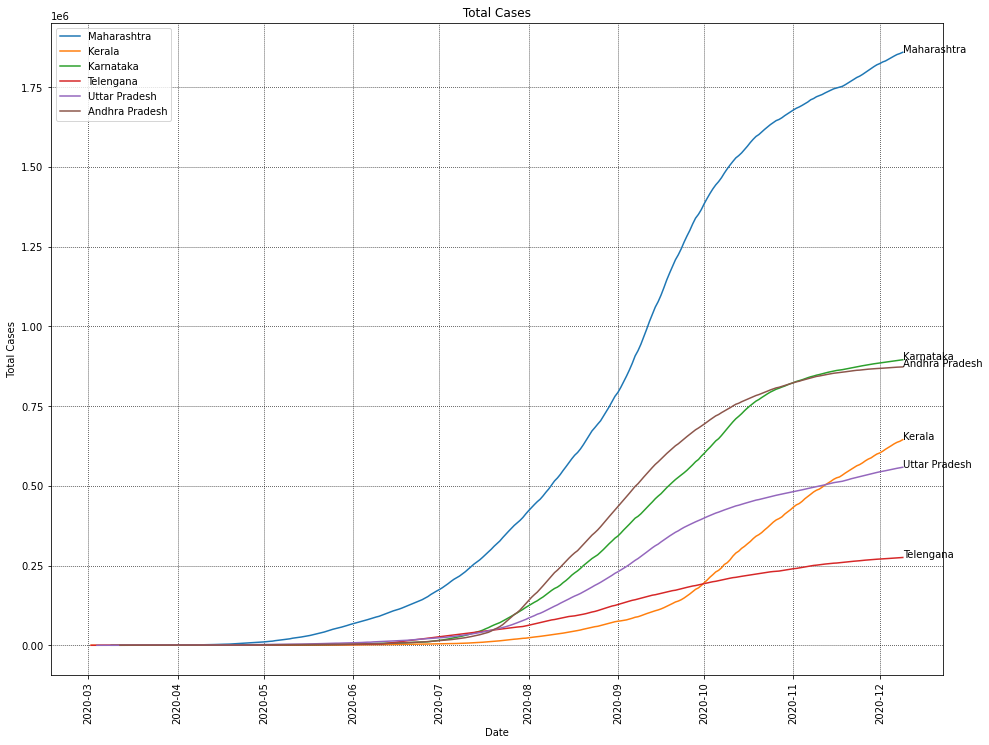

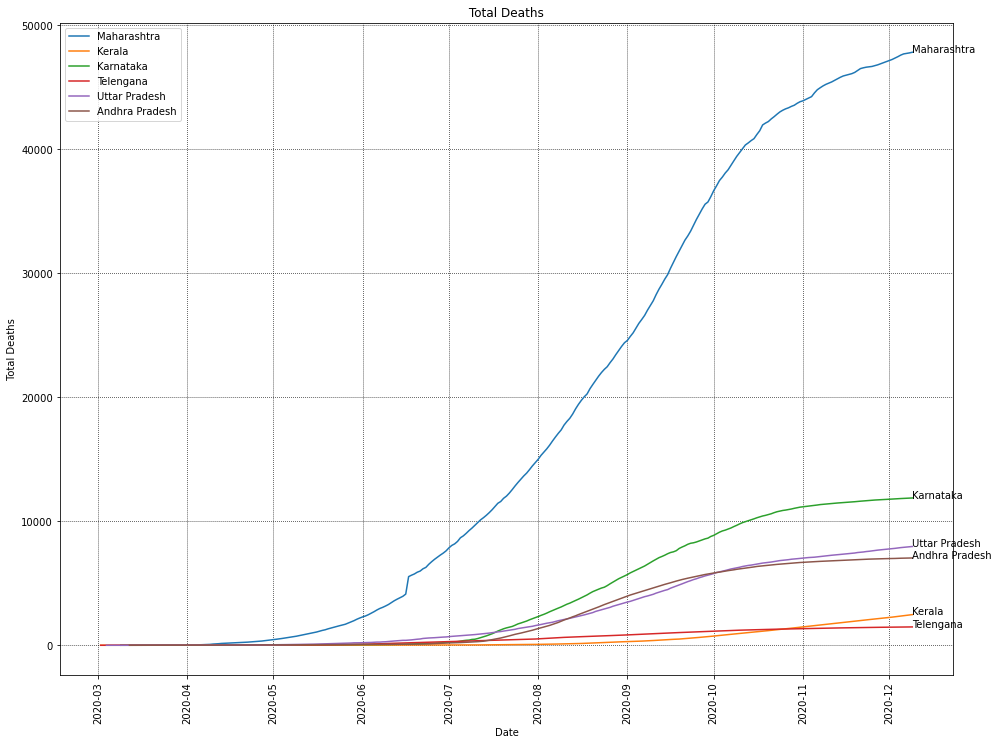

In [12]:
CVD_state_aggregate = CVD.groupby(['State', 'Date']).sum().reset_index()

states = ["Maharashtra", "Kerala", "Karnataka", "Telengana", 
                         "Uttar Pradesh", "Andhra Pradesh"]
plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Cases', size=4)    

plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Deaths', size=4)

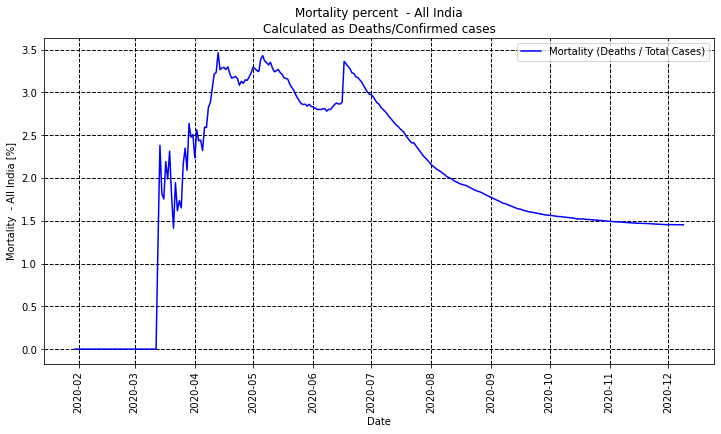

In [13]:
#log scale
#plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Cases', size=4, is_log=True)

##############################################################
#Calculate MORTALITY and plot

def plot_mortality(df, title='Mortality', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Mortality (Deaths/Cases)', data=df, color='blue', label='Mortality (Deaths / Total Cases)')
    plt.xlabel('Date')
    plt.ylabel(f'Mortality {title} [%]')
    plt.xticks(rotation=90)
    plt.title(f'Mortality percent {title}\nCalculated as Deaths/Confirmed cases')
    ax.grid(color='black', linestyle='dashed', linewidth=1)
    plt.show()  

CVD_aggregate['Mortality (Deaths/Cases)'] = CVD_aggregate['Total Deaths'] / CVD_aggregate['Total Cases'] * 100
plot_mortality(CVD_aggregate, title = ' - All India', size = 3)

############################################################

(y = Ae^(Bx)) A: -6.813501018338515e-13, B: 0.20000000043685998

Expected cases for the next 5 days: 
 [-3.66279084e-05 -4.47374284e-05 -5.46424185e-05 -6.67404007e-05
 -8.15169095e-05 -9.95649782e-05]


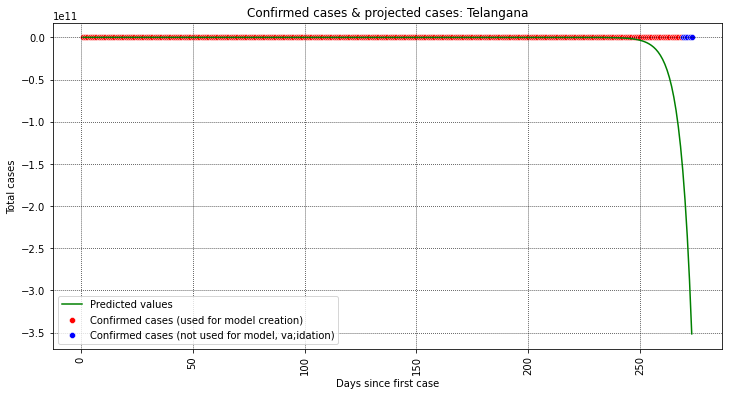

In [14]:
#PREDICTION using exponential fit 
import numpy as np
import scipy
import seaborn as sns
def plot_exponential_fit_data(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe 
    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)
#Use non-linear least squares to fit a function, f, to data.
#Let us fit data to exponential function: #y = Ae^(Bt)
    
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
# Function: lambda t, a, b: a*np.exp(b*t)
# xm y and po for initial values. 
    
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
#    print(y_fit)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, va;idation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(89,95) #As of 24 March 2020 we have 85 days of info. 
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()
    
#All India
#CVD_India = CVD_aggregate
CVD_Maharashtra = CVD_state_aggregate[CVD_state_aggregate['State']=='Maharashtra']
CVD_Telangana = CVD_state_aggregate[CVD_state_aggregate['State']=='Telengana']
CVD_Andhra = CVD_state_aggregate[CVD_state_aggregate['State']=='Andhra Pradesh']
d_df = CVD_Andhra.copy()
plot_exponential_fit_data(d_df, 'Telangana', 5)